# Principal Component Analysis with Cancer Data

In [331]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

In [332]:
bcdf = pd.read_csv('breast-cancer-wisconsin.data.txt',names=['Sample_code_number','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class'],header=0)

In [333]:
bcdf.head(10)

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [334]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [335]:
bcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
Sample_code_number             698 non-null int64
Clump_Thickness                698 non-null int64
Uniformity_of_Cell_Size        698 non-null int64
Uniformity_of_Cell_Shape       698 non-null int64
Marginal_Adhesion              698 non-null int64
Single_Epithelial_Cell_Size    698 non-null int64
Bare_Nuclei                    698 non-null object
Bland_Chromatin                698 non-null int64
Normal_Nucleoli                698 non-null int64
Mitoses                        698 non-null int64
Class                          698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [336]:
bcdf.shape

(698, 11)

In [337]:
bcdf.describe()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [338]:
# Check for missing value in any other column
bcdf.isna().sum()

Sample_code_number             0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [339]:
# We could see "?" values in column, this should be removed from data set
for i in bcdf.columns:
    print(i,':',bcdf[i].unique())

Sample_code_number : [ 1002945  1015425  1016277  1017023  1017122  1018099  1018561  1033078
  1035283  1036172  1041801  1043999  1044572  1047630  1048672  1049815
  1050670  1050718  1054590  1054593  1056784  1057013  1059552  1065726
  1066373  1066979  1067444  1070935  1071760  1072179  1074610  1075123
  1079304  1080185  1081791  1084584  1091262  1096800  1099510  1100524
  1102573  1103608  1103722  1105257  1105524  1106095  1106829  1108370
  1108449  1110102  1110503  1110524  1111249  1112209  1113038  1113483
  1113906  1115282  1115293  1116116  1116132  1116192  1116998  1117152
  1118039  1120559  1121732  1121919  1123061  1124651  1125035  1126417
  1131294  1132347  1133041  1133136  1136142  1137156  1143978  1147044
  1147699  1147748  1148278  1148873  1152331  1155546  1156272  1156948
  1157734  1158247  1160476  1164066  1165297  1165790  1165926  1166630
  1166654  1167439  1167471  1168359  1168736  1169049  1170419  1170420
  1171710  1171795  1171845  1

In [340]:
bcdf.Bare_Nuclei.unique()

array(['10', '2', '4', '1', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [341]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
bcdf.Bare_Nuclei.value_counts()

1     401
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [342]:
#16 rows with ? value

In [343]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
bcdf.Bare_Nuclei = bcdf.Bare_Nuclei.replace('?','1')

In [344]:
bcdf.Bare_Nuclei.unique()

array(['10', '2', '4', '1', '3', '9', '7', '5', '8', '6'], dtype=object)

In [345]:
bcdf.Bare_Nuclei = bcdf.Bare_Nuclei.astype(int)

In [346]:
bcdf.Bare_Nuclei.unique()

array([10,  2,  4,  1,  3,  9,  7,  5,  8,  6], dtype=int64)

In [347]:
bcdf.Bare_Nuclei.unique()

array([10,  2,  4,  1,  3,  9,  7,  5,  8,  6], dtype=int64)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [348]:
# Check for correlation of variable
bcdf.corr()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_code_number,1.000000,-0.055276,-0.041735,-0.041717,-0.065003,-0.045630,-0.092679,-0.060082,-0.052188,-0.034961,-0.080378
Clump_Thickness,-0.055276,1.000000,0.645366,0.655089,0.486699,0.522108,0.590430,0.558511,0.536176,0.350176,0.716509
Uniformity_of_Cell_Size,-0.041735,0.645366,1.000000,0.906814,0.705397,0.751674,0.686457,0.755824,0.722699,0.458548,0.817772
Uniformity_of_Cell_Shape,-0.041717,0.655089,0.906814,1.000000,0.682871,0.719524,0.707261,0.736066,0.719272,0.438756,0.818794
Marginal_Adhesion,-0.065003,0.486699,0.705397,0.682871,1.000000,0.599402,0.666765,0.666759,0.603132,0.417476,0.696605
Single_Epithelial_Cell_Size,-0.045630,0.522108,0.751674,0.719524,0.599402,1.000000,0.583484,0.616108,0.628704,0.478975,0.682618
Bare_Nuclei,-0.092679,0.590430,0.686457,0.707261,0.666765,0.583484,1.000000,0.674281,0.574524,0.342203,0.818839
Bland_Chromatin,-0.060082,0.558511,0.755824,0.736066,0.666759,0.616108,0.674281,1.000000,0.665914,0.344118,0.756732
Normal_Nucleoli,-0.052188,0.536176,0.722699,0.719272,0.603132,0.628704,0.574524,0.665914,1.000000,0.428185,0.712067
Mitoses,-0.034961,0.350176,0.458548,0.438756,0.417476,0.478975,0.342203,0.344118,0.428185,1.000000,0.423008


In [349]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [350]:
#Let us check for pair plots

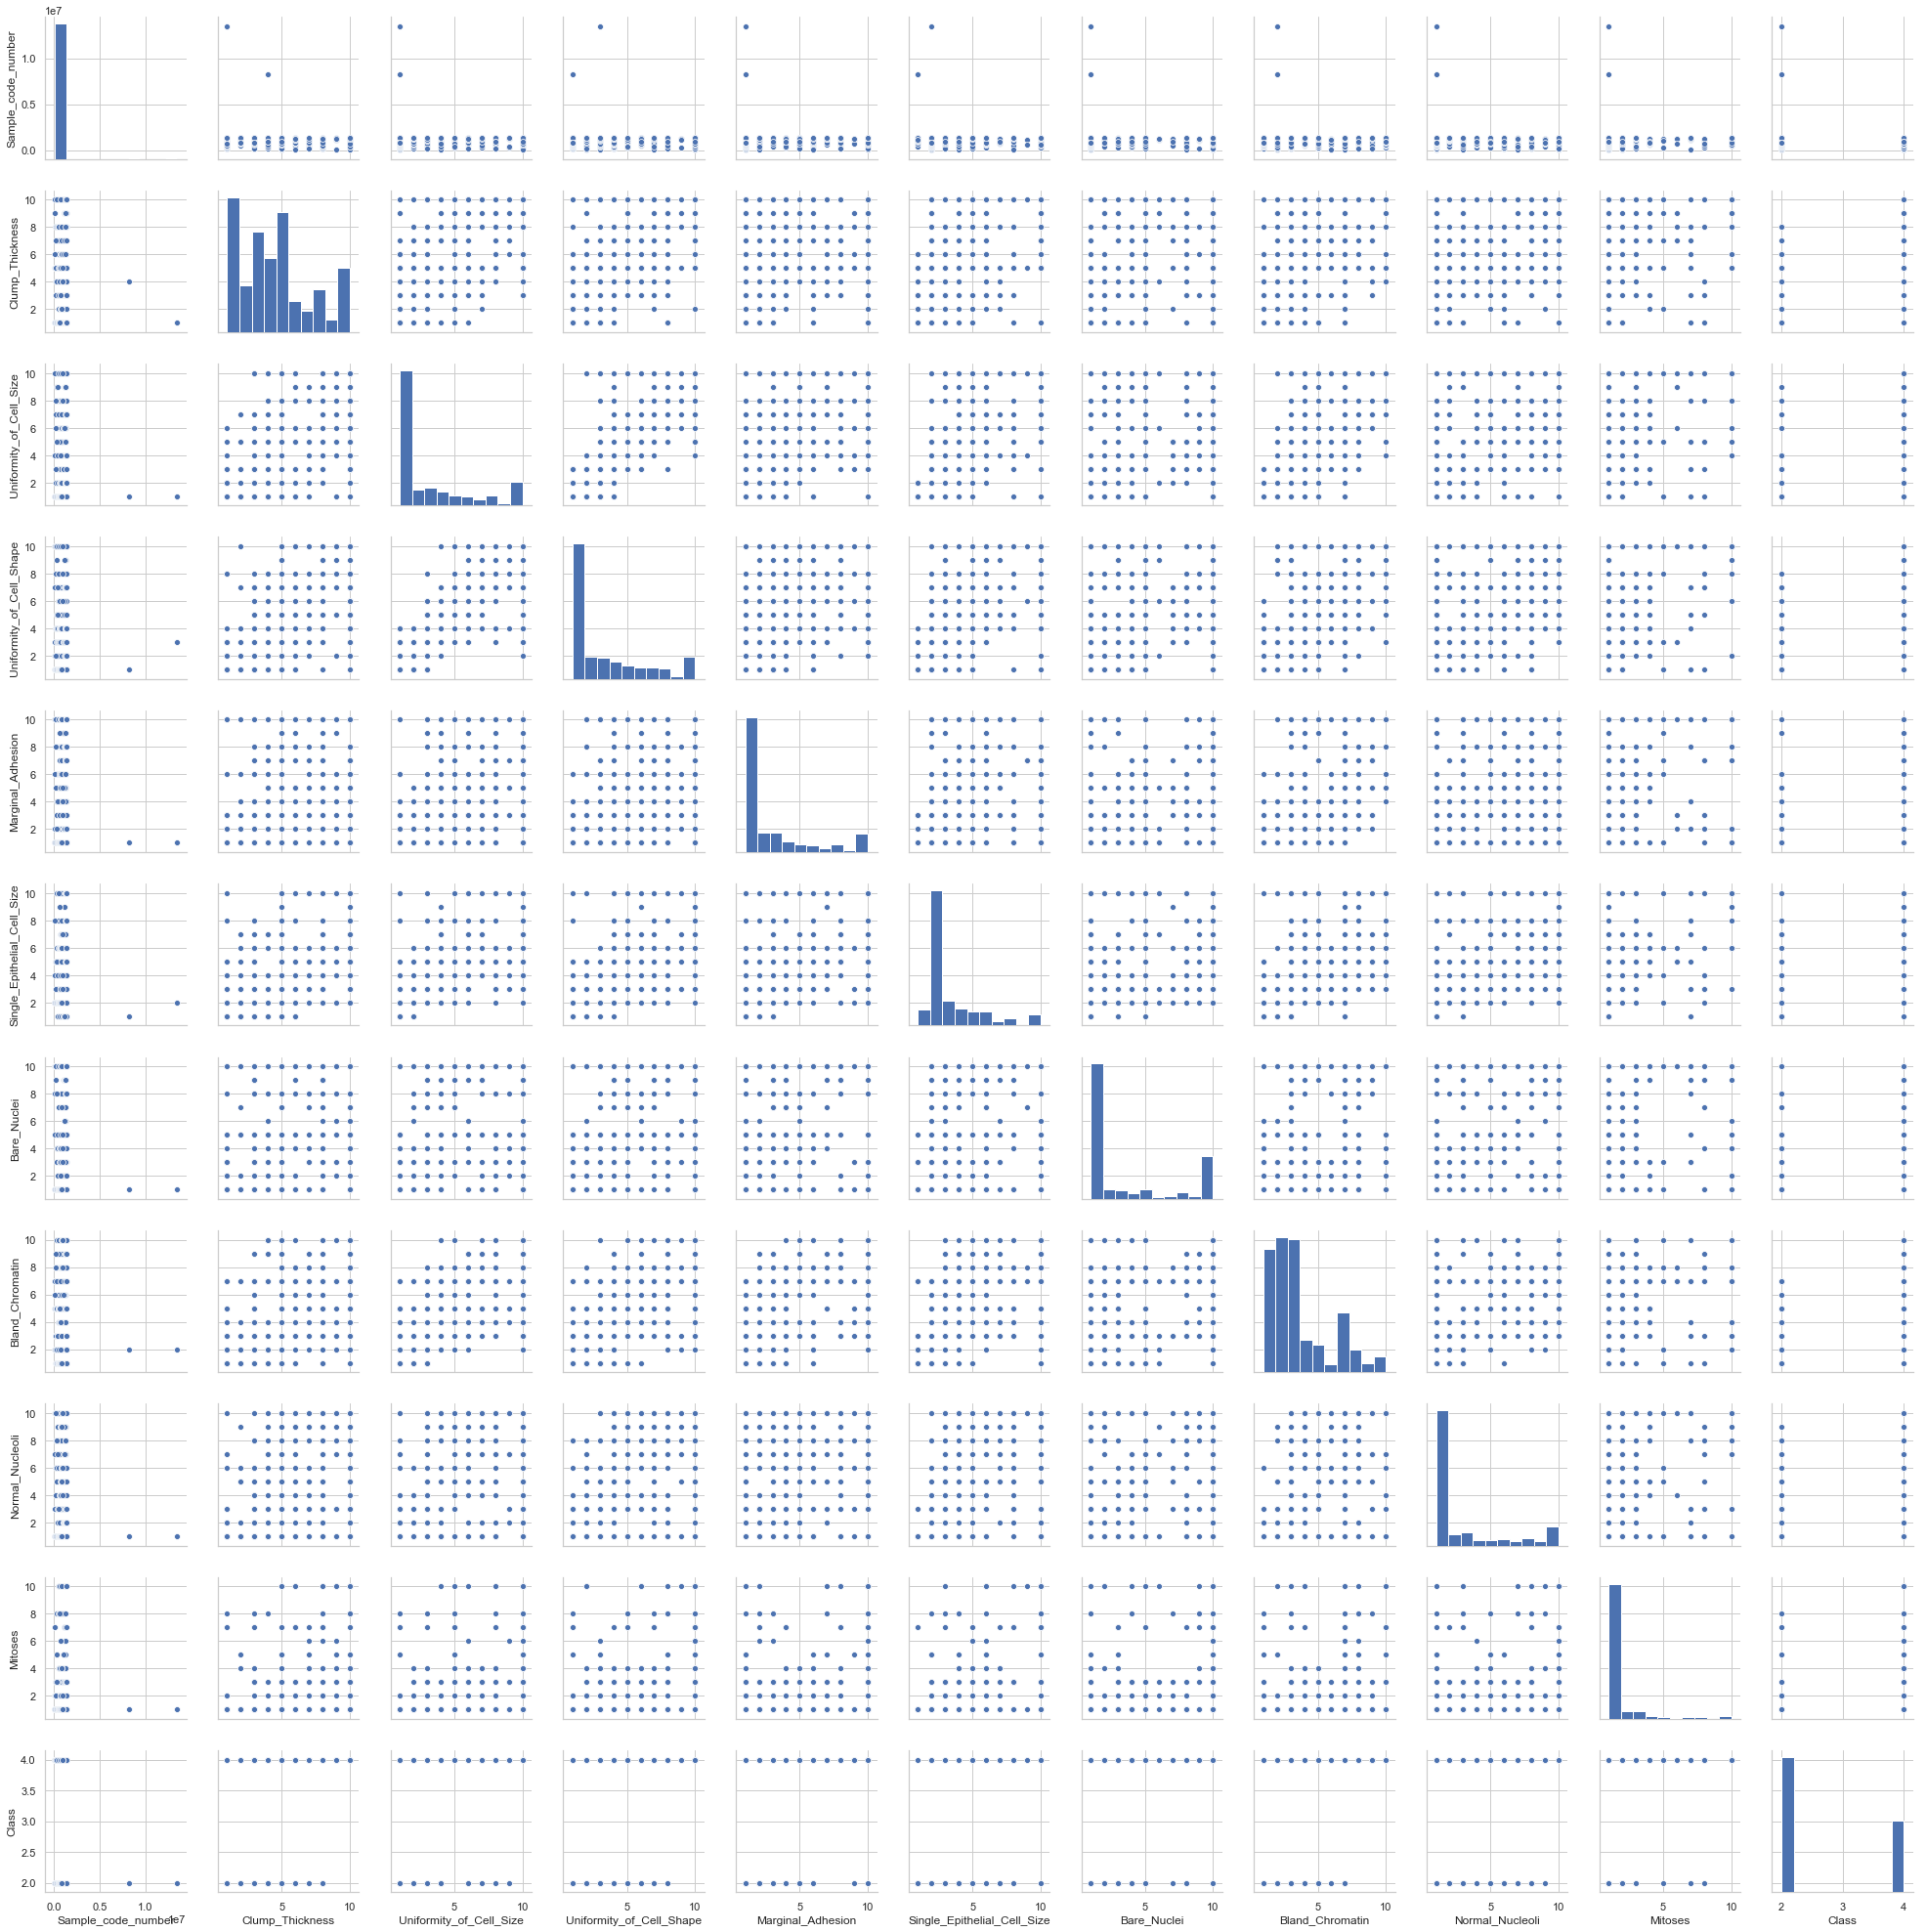

In [351]:
sns.pairplot(bcdf)

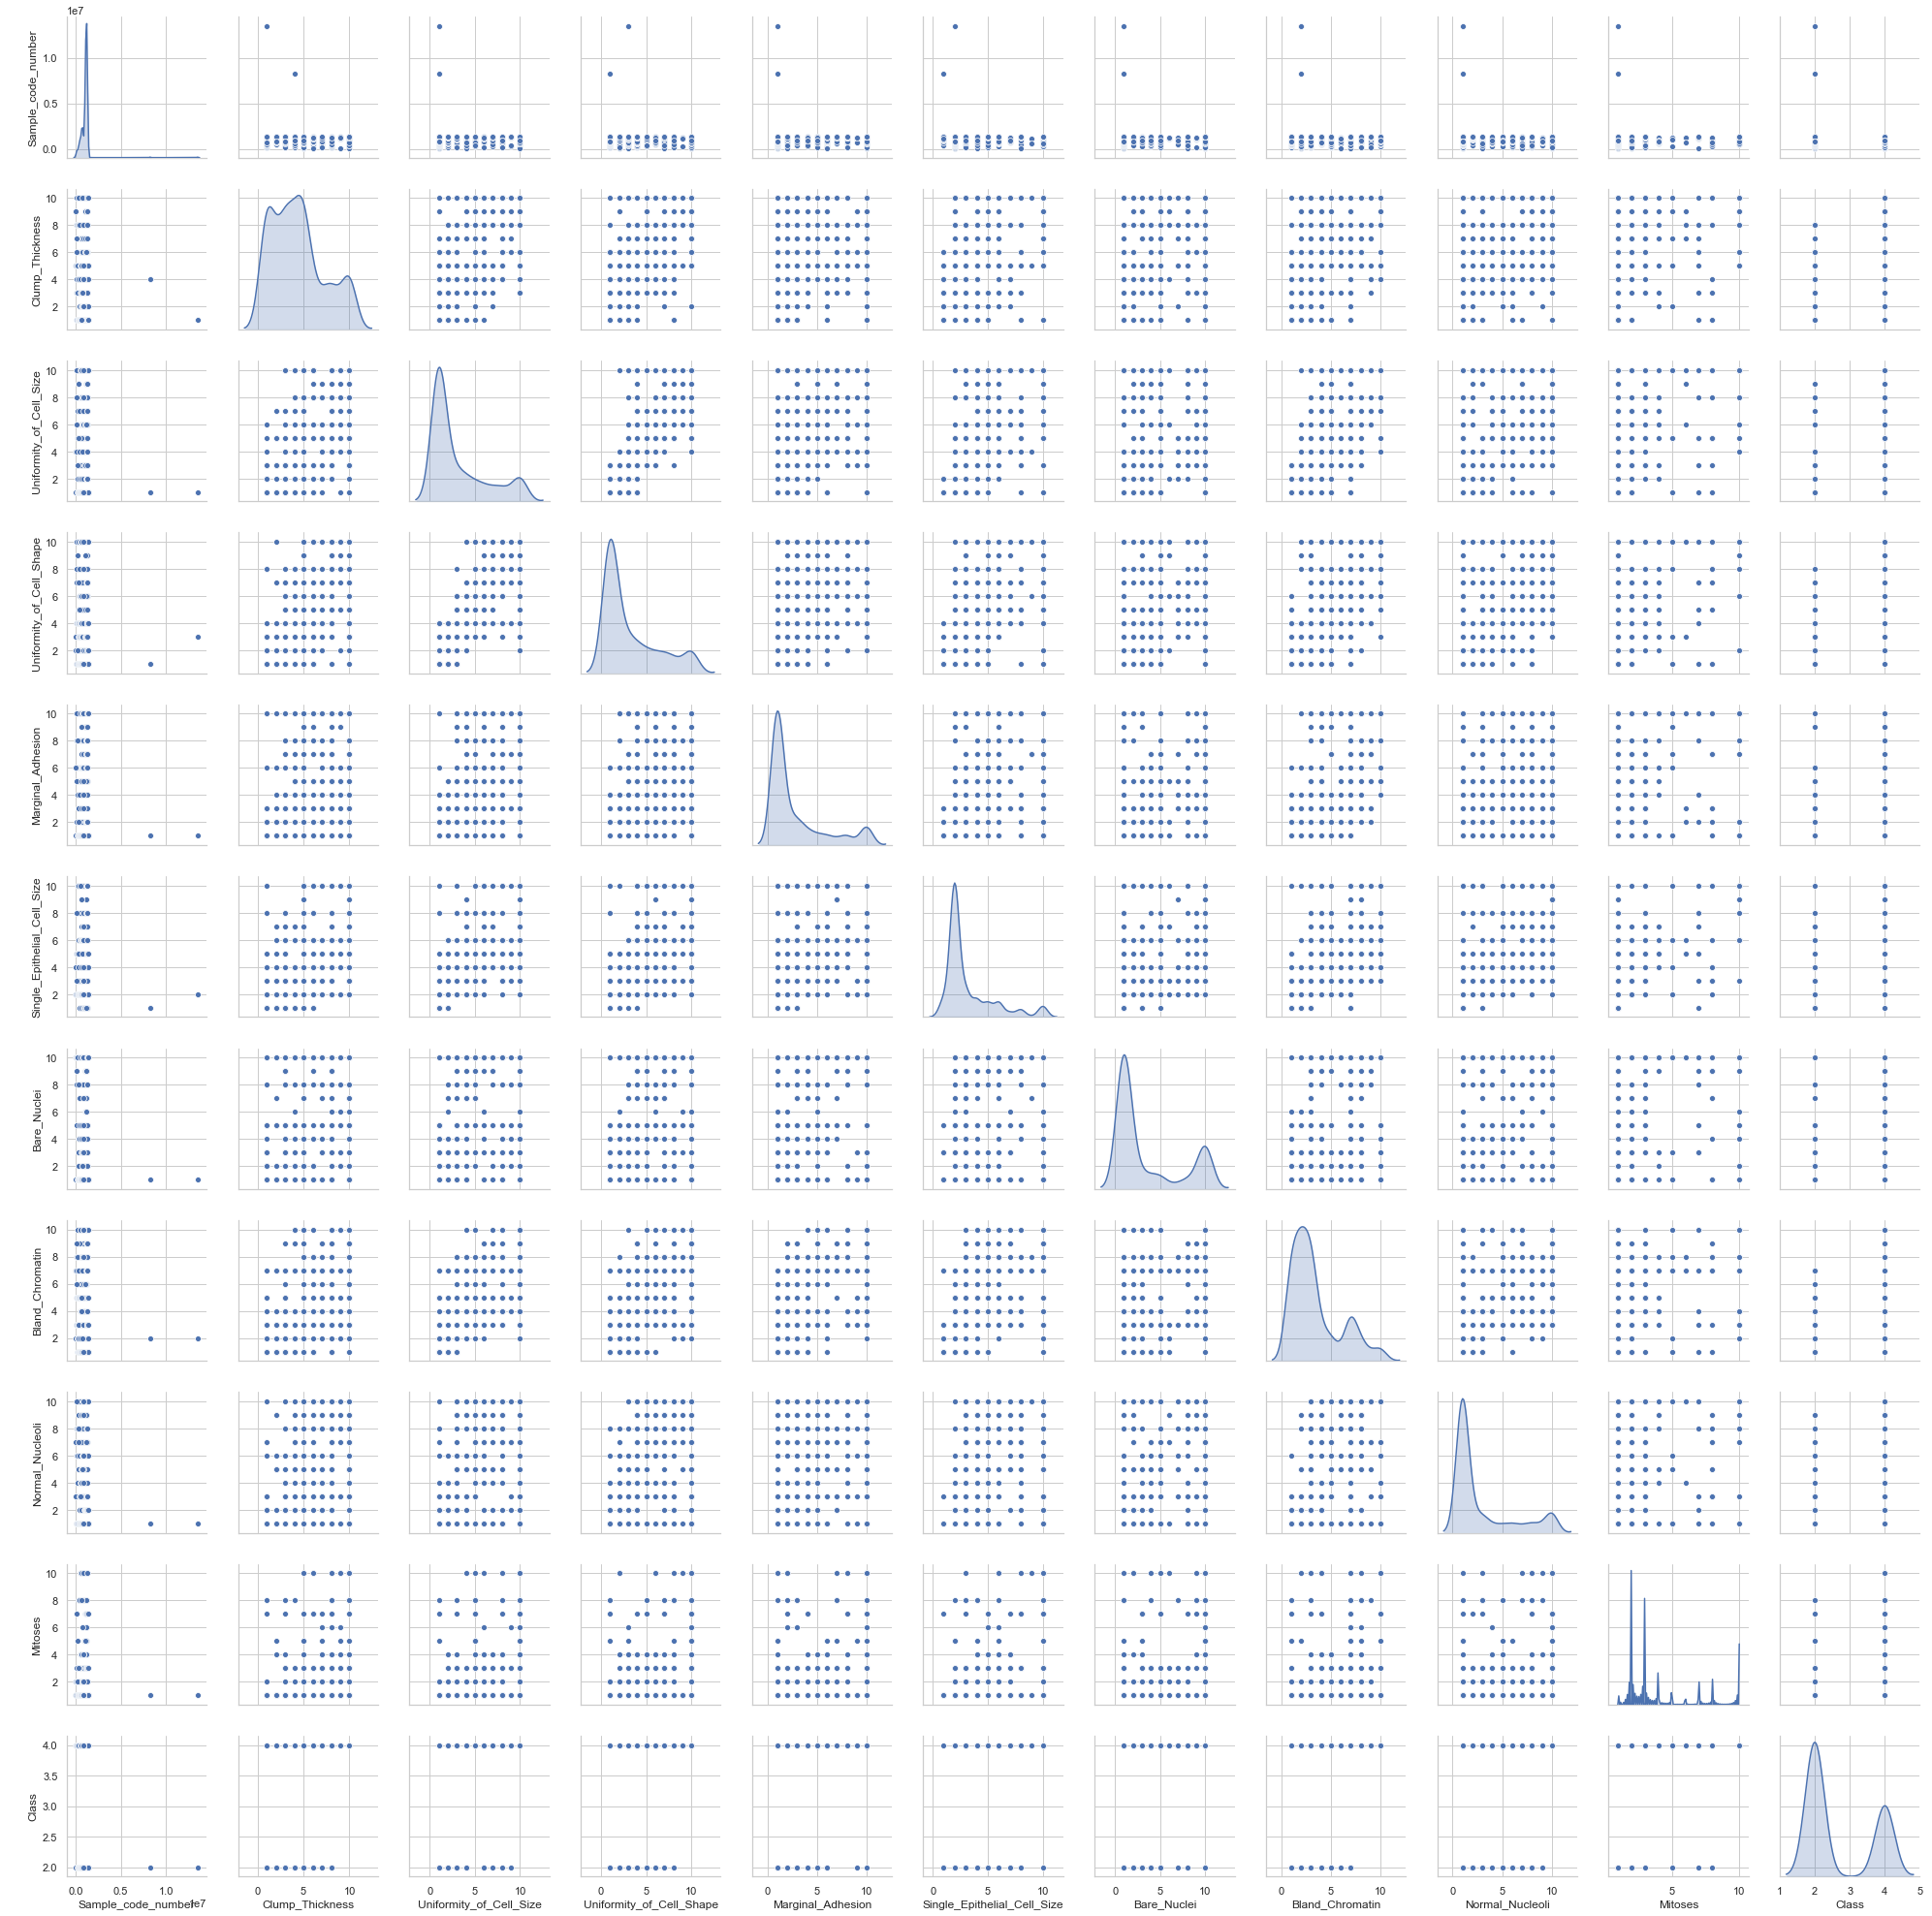

In [352]:
sns.pairplot(bcdf,diag_kind='kde')

In [353]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10
#Inference - The data is right skewed for most of the classes and the class data is imbalanced as right peak is smaller than left peak

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [354]:
# We could see most of the outliers are now removed.

In [355]:
bcdf = bcdf.drop(['Sample_code_number'],axis=1)

[Text(0, 0, 'Clump_Thickness'),
 Text(0, 0, 'Uniformity_of_Cell_Size'),
 Text(0, 0, 'Uniformity_of_Cell_Shape'),
 Text(0, 0, 'Marginal_Adhesion'),
 Text(0, 0, 'Single_Epithelial_Cell_Size'),
 Text(0, 0, 'Bare_Nuclei'),
 Text(0, 0, 'Bland_Chromatin'),
 Text(0, 0, 'Normal_Nucleoli'),
 Text(0, 0, 'Mitoses'),
 Text(0, 0, 'Class')]

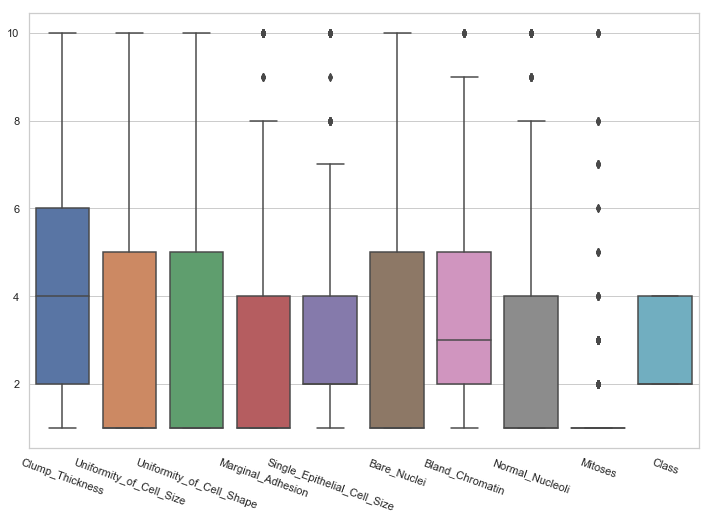

In [356]:
plt.figure(figsize=(12,8))
labels=bcdf.columns
sns.set(style="whitegrid")
g = sns.boxplot(data=bcdf)
g.set_xticklabels(labels=labels,rotation=-20)

In [357]:
pd.crosstab(bcdf['Mitoses'],bcdf['Class'])

Class,2,4
Mitoses,,
1,444,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [358]:
bcdf['Mitoses'] = np.where(bcdf['Mitoses']>=4,3,bcdf['Mitoses'])

[Text(0, 0, 'Clump_Thickness'),
 Text(0, 0, 'Uniformity_of_Cell_Size'),
 Text(0, 0, 'Uniformity_of_Cell_Shape'),
 Text(0, 0, 'Marginal_Adhesion'),
 Text(0, 0, 'Single_Epithelial_Cell_Size'),
 Text(0, 0, 'Bare_Nuclei'),
 Text(0, 0, 'Bland_Chromatin'),
 Text(0, 0, 'Normal_Nucleoli'),
 Text(0, 0, 'Mitoses'),
 Text(0, 0, 'Class')]

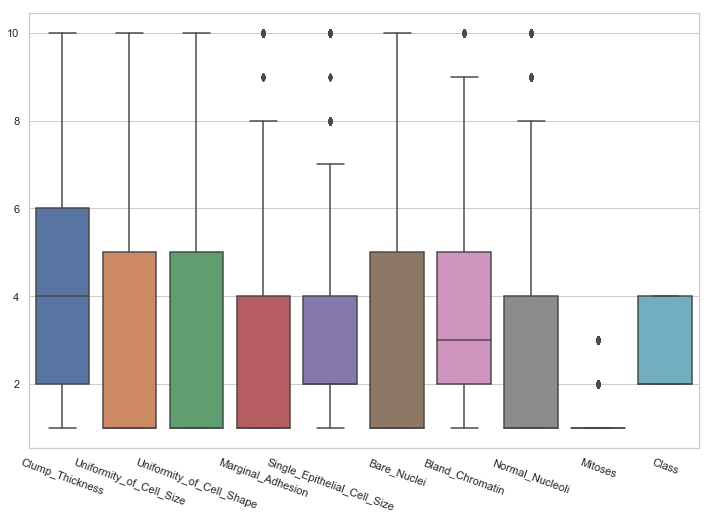

In [359]:
plt.figure(figsize=(12,8))
labels=bcdf.columns
sns.set(style="whitegrid")
g = sns.boxplot(data=bcdf)
g.set_xticklabels(labels=labels,rotation=-20)

In [360]:
pd.crosstab(bcdf['Single_Epithelial_Cell_Size'],bcdf['Class'])

Class,2,4
Single_Epithelial_Cell_Size,,
1,46,1
2,362,23
3,29,43
4,7,41
5,5,34
6,2,39
7,3,9
8,2,19
9,0,2


In [361]:
cdat = bcdf
#Removing outliers
def IQR_outliers_detect(column):
    q1 = c_dat[column].quantile(.25)
    q3 = c_dat[column].quantile(.75)
    IQR = q3-q1
    print("IQR : {}".format(IQR))
    upper = q3+(1.5*IQR)
    lower = q1-(1.5*IQR)
    print("upper cap : {}".format(upper))
    print("lower cap : {}".format(lower))

# Checking for upper and lower cap for per features with ourtliers
print(IQR_outliers_detect('Mitoses'))
print(IQR_outliers_detect('Normal_Nucleoli'))
print(IQR_outliers_detect('Single_Epithelial_Cell_Size'))
print(IQR_outliers_detect('Marginal_Adhesion'))

IQR : 0.0
upper cap : 1.0
lower cap : 1.0
None
IQR : 3.0
upper cap : 8.5
lower cap : -3.5
None
IQR : 2.0
upper cap : 7.0
lower cap : -1.0
None
IQR : 3.0
upper cap : 8.5
lower cap : -3.5
None


In [362]:
bcdf['Normal_Nucleoli'] = np.where(bcdf['Normal_Nucleoli']>=8,8,bcdf['Normal_Nucleoli'])

In [363]:
bcdf['Single_Epithelial_Cell_Size'] = np.where(bcdf['Single_Epithelial_Cell_Size']>=7,7,bcdf['Single_Epithelial_Cell_Size'])

In [364]:
bcdf['Marginal_Adhesion'] = np.where(bcdf['Marginal_Adhesion']>=8,8,bcdf['Marginal_Adhesion'])

In [365]:
bcdf.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [366]:
sc=StandardScaler()
columns=bcdf.columns
bcdf=sc.fit_transform(bcdf)

C:\Users\Nirmalya Misra\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nirmalya Misra\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q6 Create a covariance matrix for identifying Principal components

In [367]:
mean_vec = np.mean(bcdf, axis=0)
cov_mat = (bcdf - mean_vec).T.dot((bcdf - mean_vec)) / (bcdf.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.00143472 0.6462923  0.65602872 0.50456862 0.55097516 0.59127672
  0.55931278 0.5498816  0.42682775 0.71753651]
 [0.6462923  1.00143472 0.90811469 0.72415745 0.78553712 0.68744174
  0.75690801 0.7283174  0.51253474 0.81894482]
 [0.65602872 0.90811469 1.00143472 0.69858082 0.75587332 0.70827594
  0.73712156 0.72293814 0.48314337 0.81996869]
 [0.50456862 0.72415745 0.69858082 1.00143472 0.66088697 0.68338462
  0.68741745 0.63414923 0.46479793 0.7186166 ]
 [0.55097516 0.78553712 0.75587332 0.66088697 1.00143472 0.62922247
  0.65588494 0.68646363 0.50659654 0.72955768]
 [0.59127672 0.68744174 0.70827594 0.68338462 0.62922247 1.00143472
  0.67524886 0.59753802 0.4534875  0.82001427]
 [0.55931278 0.75690801 0.73712156 0.68741745 0.65588494 0.67524886
  1.00143472 0.67220218 0.399652   0.75781791]
 [0.5498816  0.7283174  0.72293814 0.63414923 0.68646363 0.59753802
  0.67220218 1.00143472 0.49136861 0.72717996]
 [0.42682775 0.51253474 0.48314337 0.46479793 0.50659654 0.45

In [368]:
#we can also do
print('NumPy covariance matrix: \n%s' %np.cov(bcdf.T))

NumPy covariance matrix: 
[[1.00143472 0.6462923  0.65602872 0.50456862 0.55097516 0.59127672
  0.55931278 0.5498816  0.42682775 0.71753651]
 [0.6462923  1.00143472 0.90811469 0.72415745 0.78553712 0.68744174
  0.75690801 0.7283174  0.51253474 0.81894482]
 [0.65602872 0.90811469 1.00143472 0.69858082 0.75587332 0.70827594
  0.73712156 0.72293814 0.48314337 0.81996869]
 [0.50456862 0.72415745 0.69858082 1.00143472 0.66088697 0.68338462
  0.68741745 0.63414923 0.46479793 0.7186166 ]
 [0.55097516 0.78553712 0.75587332 0.66088697 1.00143472 0.62922247
  0.65588494 0.68646363 0.50659654 0.72955768]
 [0.59127672 0.68744174 0.70827594 0.68338462 0.62922247 1.00143472
  0.67524886 0.59753802 0.4534875  0.82001427]
 [0.55931278 0.75690801 0.73712156 0.68741745 0.65588494 0.67524886
  1.00143472 0.67220218 0.399652   0.75781791]
 [0.5498816  0.7283174  0.72293814 0.63414923 0.68646363 0.59753802
  0.67220218 1.00143472 0.49136861 0.72717996]
 [0.42682775 0.51253474 0.48314337 0.46479793 0.506596

In [369]:
bcdf = pd.DataFrame(bcdf,columns=columns)

In [370]:
bcdf = bcdf.drop('Class',axis=1)

In [371]:
pca = PCA(n_components = 6)
pca.fit(bcdf)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [372]:
X_pca = pca.transform(bcdf)

In [373]:
pca.components_

array([[ 0.2996364 ,  0.37442271,  0.37026654,  0.33451936,  0.34452795,
         0.33202715,  0.34056374,  0.33556501,  0.25198427],
       [ 0.00999992, -0.09332422, -0.13135862, -0.10019731,  0.02369111,
        -0.11514757, -0.28252573,  0.01595688,  0.9327381 ],
       [-0.88556164,  0.02372404, -0.04471915,  0.34648339,  0.19031372,
        -0.08049603,  0.13168955,  0.17000362,  0.0649993 ],
       [ 0.01815928,  0.22251773,  0.1971206 , -0.42478404,  0.33188247,
        -0.6430062 , -0.09860365,  0.42771599, -0.12079529],
       [-0.07095821,  0.25810955,  0.24287564,  0.03618501,  0.52114297,
         0.0313497 , -0.38450315, -0.66720074, -0.04974097],
       [ 0.07490389,  0.21376652,  0.11198434,  0.19586588, -0.28005789,
        -0.56614733,  0.53041393, -0.43704157,  0.16275704]])

In [374]:
np.cumsum(pca.explained_variance_ratio_)

array([0.67483203, 0.75038958, 0.80976048, 0.85943046, 0.89719379,
       0.93010797])

# Q7 Identify eigen values and eigen vector

In [375]:
# Step 2- Get eigen values and eigen vector

In [376]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(bcdf.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.2996364   0.00999992  0.88556164  0.00405987  0.01815928 -0.18691501
   0.07095821 -0.28278876  0.07490389]
 [ 0.37442271 -0.09332422 -0.02372404  0.73848187  0.22251773  0.36692429
  -0.25810955  0.0933578   0.21376652]
 [ 0.37026654 -0.13135862  0.04471915 -0.65947045  0.1971206   0.52434274
  -0.24287564  0.15305429  0.11198434]
 [ 0.33451936 -0.10019731 -0.34648339 -0.05134868 -0.42478404  0.0182347
  -0.03618501 -0.73138436  0.19586588]
 [ 0.34452795  0.02369111 -0.19031372 -0.07197075  0.33188247 -0.6157201
  -0.52114297 -0.00777762 -0.28005789]
 [ 0.33202715 -0.11514757  0.08049603  0.08254805 -0.6430062   0.07987112
  -0.0313497   0.34908916 -0.56614733]
 [ 0.34056374 -0.28252573 -0.13168955 -0.05881039 -0.09860365 -0.39802519
   0.38450315  0.43135416  0.53041393]
 [ 0.33556501  0.01595688 -0.17000362  0.02625728  0.42771599  0.10456912
   0.66720074 -0.16587041 -0.43704157]
 [ 0.25198427  0.9327381  -0.0649993  -0.03078961 -0.12079529  0.01766752
   0.04974

# Q8 Find variance and cumulative variance by each eigen vector

In [377]:
#variance is eigenvalue
eig_vals


array([6.08220199, 0.68099362, 0.53510469, 0.08821617, 0.44767124,
       0.24855031, 0.3403576 , 0.29316423, 0.29665263])

In [378]:
#cumulative variance
c=np.cumsum(eig_vals)

In [379]:
#percentage
c/9.01*100

array([ 67.50501654,  75.06321429,  81.00222309,  81.98131483,
        86.94991907,  89.7085241 ,  93.48607792,  96.73984299,
       100.032325  ])

In [380]:
# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [381]:
pca = PCA()
pca.fit(bcdf)
X_pca = pca.transform(bcdf)
print('X_pca.shape:\n',X_pca.shape)
print('pca.components_:\n',pca.components_)
print('pca.explained_variance_:\n',pca.explained_variance_)
print(',pca.explained_variance_ratio_:\n',pca.explained_variance_ratio_)
print('np.cumsum(pca.explained_variance_ratio_:\n',np.cumsum(pca.explained_variance_ratio_)*100)

X_pca.shape:
 (698, 9)
pca.components_:
 [[ 0.2996364   0.37442271  0.37026654  0.33451936  0.34452795  0.33202715
   0.34056374  0.33556501  0.25198427]
 [ 0.00999992 -0.09332422 -0.13135862 -0.10019731  0.02369111 -0.11514757
  -0.28252573  0.01595688  0.9327381 ]
 [-0.88556164  0.02372404 -0.04471915  0.34648339  0.19031372 -0.08049603
   0.13168955  0.17000362  0.0649993 ]
 [ 0.01815928  0.22251773  0.1971206  -0.42478404  0.33188247 -0.6430062
  -0.09860365  0.42771599 -0.12079529]
 [-0.07095821  0.25810955  0.24287564  0.03618501  0.52114297  0.0313497
  -0.38450315 -0.66720074 -0.04974097]
 [ 0.07490389  0.21376652  0.11198434  0.19586588 -0.28005789 -0.56614733
   0.53041393 -0.43704157  0.16275704]
 [ 0.28278876 -0.0933578  -0.15305429  0.73138436  0.00777762 -0.34908916
  -0.43135416  0.16587041 -0.13214762]
 [-0.18691501  0.36692429  0.52434274  0.0182347  -0.6157201   0.07987112
  -0.39802519  0.10456912  0.01766752]
 [ 0.00405987  0.73848187 -0.65947045 -0.05134868 -0.0719

In [382]:
pca = PCA(n_components=7)
pca.fit(bcdf)
X_pca = pca.transform(bcdf)
print('X_pca.shape:\n',X_pca.shape)
print('pca.components_:\n',pca.components_)
print('pca.explained_variance_:\n',pca.explained_variance_)
print(',pca.explained_variance_ratio_:\n',pca.explained_variance_ratio_)
print('np.cumsum(pca.explained_variance_ratio_:\n',np.cumsum(pca.explained_variance_ratio_)*100)

X_pca.shape:
 (698, 7)
pca.components_:
 [[ 0.2996364   0.37442271  0.37026654  0.33451936  0.34452795  0.33202715
   0.34056374  0.33556501  0.25198427]
 [ 0.00999992 -0.09332422 -0.13135862 -0.10019731  0.02369111 -0.11514757
  -0.28252573  0.01595688  0.9327381 ]
 [-0.88556164  0.02372404 -0.04471915  0.34648339  0.19031372 -0.08049603
   0.13168955  0.17000362  0.0649993 ]
 [ 0.01815928  0.22251773  0.1971206  -0.42478404  0.33188247 -0.6430062
  -0.09860365  0.42771599 -0.12079529]
 [-0.07095821  0.25810955  0.24287564  0.03618501  0.52114297  0.0313497
  -0.38450315 -0.66720074 -0.04974097]
 [ 0.07490389  0.21376652  0.11198434  0.19586588 -0.28005789 -0.56614733
   0.53041393 -0.43704157  0.16275704]
 [ 0.28278876 -0.0933578  -0.15305429  0.73138436  0.00777762 -0.34908916
  -0.43135416  0.16587041 -0.13214762]]
pca.explained_variance_:
 [6.08220199 0.68099362 0.53510469 0.44767124 0.3403576  0.29665263
 0.29316423]
,pca.explained_variance_ratio_:
 [0.67483203 0.07555755 0.05937

# Q10 Find correlation between components and features

In [383]:
pcacomp = pd.DataFrame(pca.components_,columns=['Sample_code_number','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli'])

In [384]:
pcacomp

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli
0,0.299636,0.374423,0.370267,0.334519,0.344528,0.332027,0.340564,0.335565,0.251984
1,0.010000,-0.093324,-0.131359,-0.100197,0.023691,-0.115148,-0.282526,0.015957,0.932738
2,-0.885562,0.023724,-0.044719,0.346483,0.190314,-0.080496,0.131690,0.170004,0.064999
3,0.018159,0.222518,0.197121,-0.424784,0.331882,-0.643006,-0.098604,0.427716,-0.120795
4,-0.070958,0.258110,0.242876,0.036185,0.521143,0.031350,-0.384503,-0.667201,-0.049741
5,0.074904,0.213767,0.111984,0.195866,-0.280058,-0.566147,0.530414,-0.437042,0.162757
6,0.282789,-0.093358,-0.153054,0.731384,0.007778,-0.349089,-0.431354,0.165870,-0.132148


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [385]:
ratings = pd.read_csv('jokes.csv')

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [386]:
ratings.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [392]:
ratings.drop('NumJokes',axis=1,inplace=True)
ratings = ratings.iloc[0:200,:]

In [393]:
# Q13 Change the column indices from 0 to 99

In [398]:
jokescolumnnames = range(0,100)

In [399]:
jokescolumnnames

range(0, 100)

In [400]:
ratings.columns = jokescolumnnames

In [401]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [402]:
ratings.replace(99.00,0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [403]:
ratings_diff = sc.fit_transform(ratings)

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [404]:
type(ratings_diff)

numpy.ndarray

In [405]:
ratings_diff = pd.DataFrame(ratings_diff,columns=jokescolumnnames)

In [406]:
mean_rating = ratings_diff.mean(axis=0)

In [407]:
n = pd.DataFrame(mean_rating)

# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [408]:
n.columns = ['Joke']
n.nlargest(10,['Joke'])

,Joke
87,2.831069e-16
84,2.642331e-16
3,2.536860e-16
95,2.342571e-16
72,2.153833e-16
70,1.743050e-16
93,1.676437e-16
83,1.665335e-16
96,1.476597e-16
63,1.426637e-16
